In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
from stl import mesh

# Generating Own Mask

We are dealing with a 3D image. Consider the $z$ axis: for each slice along this access, consider the mask

$$z \leq  x^2 + y^2 \leq 1.5z$$

This mask is a ring, and these rings grow larger as $z$ grows larger. To make this mask, we can use 2D/3D meshgrids:

In [2]:
x = y = np.linspace(-1,1,100)
z = np.linspace(0,0.5,100)
x2d, y2d = np.meshgrid(x,y, indexing='xy')
x3d, y3d, z3d = np.meshgrid(x,y,z, indexing='xy')

Create the mask

In [3]:
mask = (x3d**2 + y3d**2 >= z3d) * (x3d**2 + y3d**2 <= 1.5*z3d)
mask[:,:,-1] = 0
mask[:,:,0] = 0

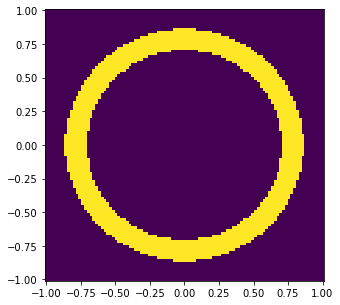

In [4]:
plt.figure(figsize=(5,5))
plt.pcolormesh(x2d, y2d, mask[:,:,-2])

In [25]:
verts, faces, normals, values = measure.marching_cubes(mask)

In [26]:
verts

array([[ 6.5, 46. , 98. ],
       [ 7. , 46. , 97.5],
       [ 7. , 45.5, 98. ],
       ...,
       [92.5, 51. , 98. ],
       [92.5, 52. , 98. ],
       [92.5, 53. , 98. ]], dtype=float32)

The vertices are a list of points that exist on the object (these correspond to ($x$, $y$, $z$) coordinates)

In [30]:
dx = np.diff(x)[0]
dy = np.diff(y)[0]
dz = np.diff(z)[0]
dr = np.array([dx,dy,dz])

In [32]:
verts = verts*dr

Each face in faces gives the index of three vertices. A triangle is drawn between these 3 vertices in an STL file (this is how 3D graphics are made)

In [34]:
faces

array([[    2,     1,     0],
       [    0,     3,     2],
       [    0,     1,     4],
       ...,
       [52134, 52167, 52166],
       [52167, 52145, 52139],
       [52145, 52167, 52140]])

* **Faces** correspond to a list of 3 indices (1,2,3,4) that specify a triangle
* **Vertices** are the actual vectors corresponding to these indices ($\vec{r}_1$, $\vec{r}_2$, ...)

<p align="center">
  <img src="../images/vert_face.PNG" alt="drawing" width="300" align="center"/>
</p>

We can create the 3D object (mesh) using the list of vertices and faces

1.  create the mesh `obj_3d`, which contains the same number of elements as there are faces. What we are really interested in is the `obj_3d.vectors` attribute.  Each element of `obj_3d.vectors` contains 3 vectors, corresponding to the vertices that the triagnle needs to be drawn between.

In [35]:
faces.shape

(104480, 3)

In [36]:
obj_3d = mesh.Mesh(np.zeros(faces.shape[0], dtype=mesh.Mesh.dtype))

In [37]:
obj_3d.vectors.shape

(104480, 3, 3)

2. loop through all the faces, and append to `obj_3d.vectors`.

In [38]:
faces[3]

array([4, 1, 5])

In [39]:
obj_3d.vectors[0]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [40]:
faces[4]

array([3, 0, 6])

In [41]:
verts[faces[0]]

array([[0.14141414, 0.91919192, 0.49494949],
       [0.14141414, 0.92929293, 0.49242424],
       [0.13131313, 0.92929293, 0.49494949]])

In [42]:
for i, f in enumerate(faces):
    obj_3d.vectors[i] = verts[f]

In [43]:
obj_3d.vectors[2]

array([[0.13131313, 0.9292929 , 0.4949495 ],
       [0.14141414, 0.9292929 , 0.49242425],
       [0.13131313, 0.94949496, 0.4949495 ]], dtype=float32)

Then we can save the file really easily:

In [44]:
obj_3d.save('3D_file.stl')